# Integrantes do grupo da GS

- Andressa Vitória **RM93995**
- Bianca Teixeira **RM92831**
- Jefferson de Andrade **RM96236**
- Kamilla Lima **RM96112**
- Vinicius Souza **RM96188**

In [1]:
# Fazer os imports

import pandas as pd

# gráficos
import seaborn as sns
import matplotlib.pyplot as plt

# Avaliar os algoritmos
from sklearn.metrics import classification_report

# Splitar os dados
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, plot_confusion_matrix
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score, classification_report

## ML de classificação

## Análise Exploratória do "sensor_readings_24.csv"

- contendo filtragem de valores vazios e 
outliers, estatísticas básicas, e gráficos

In [56]:
dados = pd.read_csv("sensor_readings_24.csv", sep=",")
dados.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,funcao_robo
0,0.438,0.498,3.625,3.645,5.0,2.918,5.0,2.351,2.332,2.643,...,0.593,0.502,0.493,0.504,0.445,0.431,0.444,0.440,0.429,Slight-Right-Turn
1,0.438,0.498,3.625,3.648,5.0,2.918,5.0,2.637,2.332,2.649,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.443,0.429,Slight-Right-Turn
2,0.438,0.498,3.625,3.629,5.0,2.918,5.0,2.637,2.334,2.643,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.446,0.429,Slight-Right-Turn
3,0.437,0.501,3.625,3.626,5.0,2.918,5.0,2.353,2.334,2.642,...,0.593,0.502,0.493,0.504,0.449,0.431,0.444,0.444,0.429,Slight-Right-Turn
4,0.438,0.498,3.626,3.629,5.0,2.918,5.0,2.640,2.334,2.639,...,0.592,0.502,0.493,0.504,0.449,0.431,0.444,0.441,0.429,Slight-Right-Turn


## Tratamento dados faltantes e identificação de outliers

In [57]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5442 non-null   float64
 1   sensor_2     5442 non-null   float64
 2   sensor_3     5442 non-null   float64
 3   sensor_4     5442 non-null   float64
 4   sensor_5     5442 non-null   float64
 5   sensor_6     5442 non-null   float64
 6   sensor_7     5442 non-null   float64
 7   sensor_8     5442 non-null   float64
 8   sensor_9     5442 non-null   float64
 9   sensor_10    5442 non-null   float64
 10  sensor_11    5442 non-null   float64
 11  sensor_12    5442 non-null   float64
 12  sensor_13    5442 non-null   float64
 13  sensor_14    5442 non-null   float64
 14  sensor_15    5442 non-null   float64
 15  sensor_16    5442 non-null   float64
 16  sensor_17    5442 non-null   float64
 17  sensor_18    5442 non-null   float64
 18  sensor_19    5442 non-null   float64
 19  sensor

In [58]:
dados = dados.dropna()
dados.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5115 entries, 0 to 5455
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   sensor_1     5115 non-null   float64
 1   sensor_2     5115 non-null   float64
 2   sensor_3     5115 non-null   float64
 3   sensor_4     5115 non-null   float64
 4   sensor_5     5115 non-null   float64
 5   sensor_6     5115 non-null   float64
 6   sensor_7     5115 non-null   float64
 7   sensor_8     5115 non-null   float64
 8   sensor_9     5115 non-null   float64
 9   sensor_10    5115 non-null   float64
 10  sensor_11    5115 non-null   float64
 11  sensor_12    5115 non-null   float64
 12  sensor_13    5115 non-null   float64
 13  sensor_14    5115 non-null   float64
 14  sensor_15    5115 non-null   float64
 15  sensor_16    5115 non-null   float64
 16  sensor_17    5115 non-null   float64
 17  sensor_18    5115 non-null   float64
 18  sensor_19    5115 non-null   float64
 19  sensor

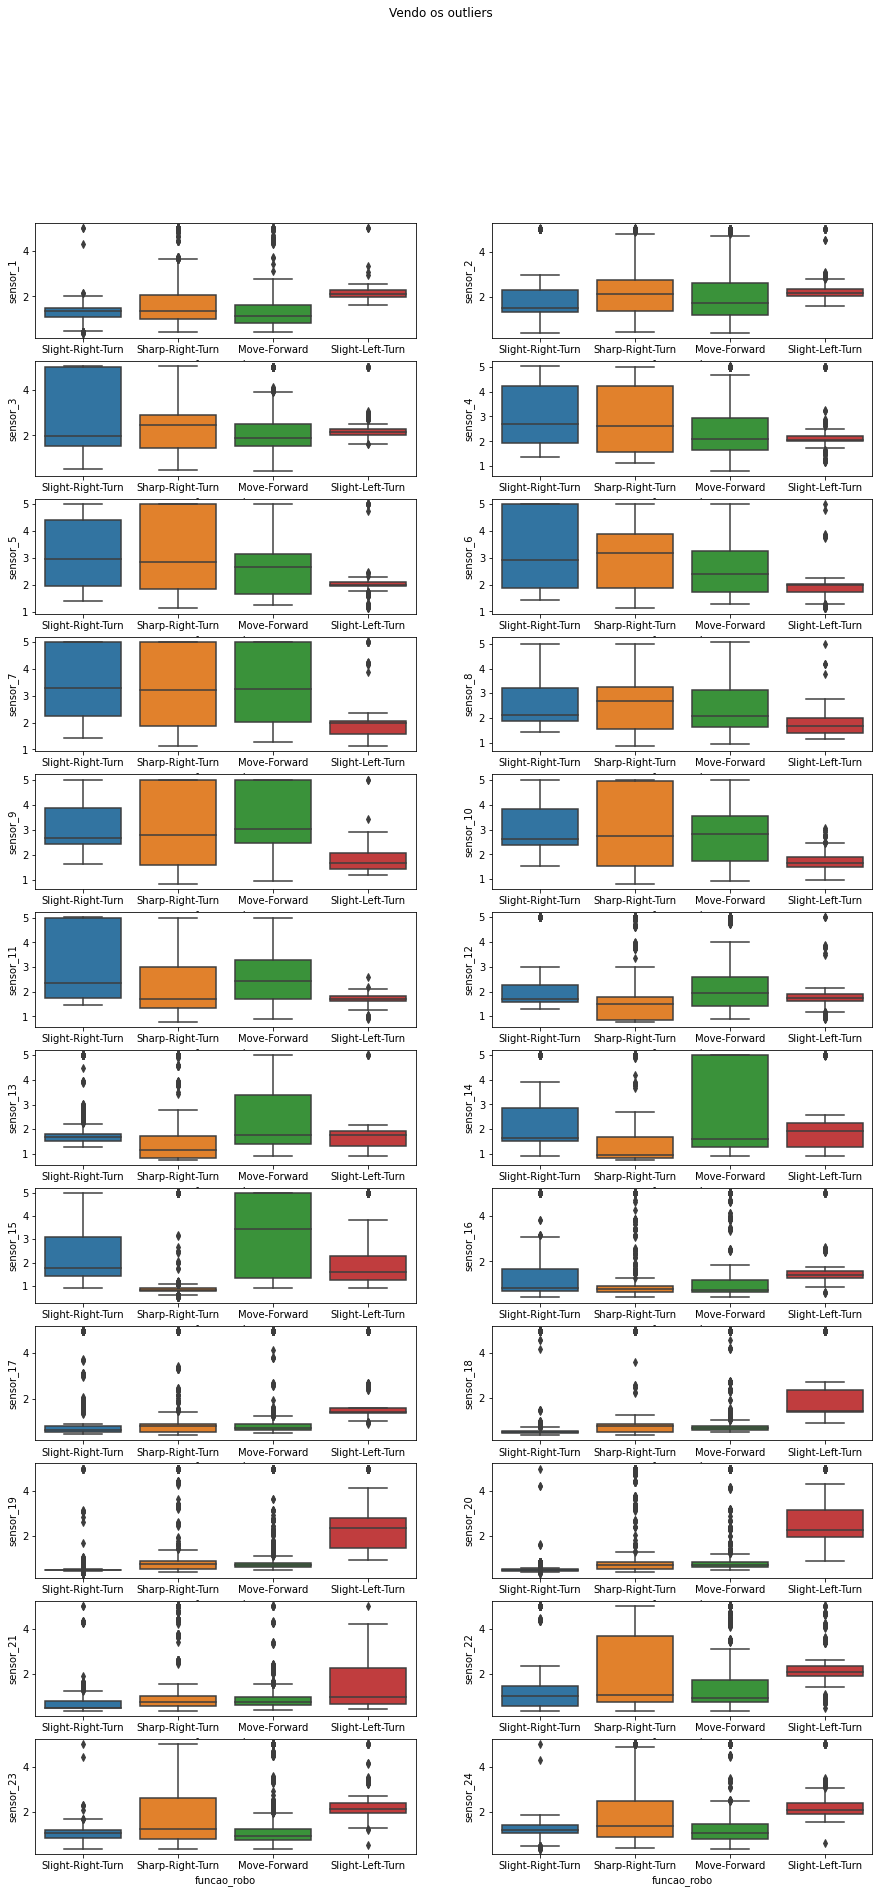

In [59]:
# x coluna com as strings
# y colunas numericas

#sns.boxplot(data=dados, x="funcao_robo", y="sensor_1")
colunas = []
for coluna in dados:
    colunas.append(coluna)

ind_col = 0
ind_linha = 0
fig, axes = plt.subplots(12, 2, figsize=(15, 30))
fig.suptitle("Vendo os outliers")
for i in range (len(colunas) - 1):
    sns.boxplot(data=dados, x=colunas[-1], y=colunas[i], ax=axes[ind_linha, ind_col])
    

    if ind_col == 1:
        ind_col = 0
        ind_linha += 1
    else:
        ind_col += 1 


## Seleção e pre-processamento de colunas (padronização/normalização)
## label encoding, one hot encoder etc

In [6]:
# Não foi necessário realizar essa parte

## Separação correta das variáveis entre features (entrada) x label (saída)

In [7]:
dados.value_counts('funcao_robo')

funcao_robo
Move-Forward         2077
Sharp-Right-Turn     1963
Slight-Right-Turn     772
Slight-Left-Turn      303
dtype: int64

In [48]:
x = dados.drop(columns = 'funcao_robo') 
y = dados['funcao_robo']             

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify=y)

In [9]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

4092
4092
1023
1023


##Seleção e treinamento de modelos pertinentes ao problema elencado / Levantar as métricas de desempenho adequadas a técnica escolhida e ao problema modelado



In [49]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [50]:
lda = LinearDiscriminantAnalysis() 
lda.fit(x_train,y_train)
y_predicoes = lda.predict(x_test) 

In [51]:
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

     Move-Forward       0.73      0.67      0.70       415
 Sharp-Right-Turn       0.66      0.80      0.72       393
 Slight-Left-Turn       0.48      0.64      0.55        61
Slight-Right-Turn       0.57      0.31      0.40       154

         accuracy                           0.66      1023
        macro avg       0.61      0.60      0.59      1023
     weighted avg       0.66      0.66      0.65      1023



pouca precisão

In [52]:
RFC = RandomForestClassifier()
RFC.fit(x_train, y_train)
y_predicoes = RFC.predict(x_test)

In [53]:
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

     Move-Forward       1.00      0.99      0.99       415
 Sharp-Right-Turn       1.00      0.99      1.00       393
 Slight-Left-Turn       0.98      0.98      0.98        61
Slight-Right-Turn       0.98      1.00      0.99       154

         accuracy                           0.99      1023
        macro avg       0.99      0.99      0.99      1023
     weighted avg       0.99      0.99      0.99      1023



overfitting

In [54]:
SVC = SVC()
SVC.fit(x_train, y_train)
y_predicoes = SVC.predict(x_test)

In [55]:
print(classification_report(y_test, y_predicoes))

                   precision    recall  f1-score   support

     Move-Forward       0.86      0.88      0.87       415
 Sharp-Right-Turn       0.90      0.94      0.92       393
 Slight-Left-Turn       0.95      0.85      0.90        61
Slight-Right-Turn       0.89      0.76      0.82       154

         accuracy                           0.88      1023
        macro avg       0.90      0.86      0.88      1023
     weighted avg       0.88      0.88      0.88      1023



bom resultado

## Capacidade de inferir conclusões a partir de uma análise exploratória e analisar o desempenho de modelos de aprendizado de máquina

- As explicações devem ser pertinentes e consistentes com as análises feitas. Será avaliada a argumentação baseada em dados.
    - uma interpretação qualitativa da análise exploratória;
    - discussão dos outliers observados
    - justificativa da escolha da abordagem (por que optaram por 
regressão/classificação/clusterização?);
    - discussão da métrica de erro (a métrica tem um bom valor? Por 
quê?)

## Conclusão 1

### Análise exploratória
  Os sensores mais próximos como o sensor 4 e 5 possuem uma correlação maior do que os sensores 9 e 5, pois os sensores 4 e 5 não possuem muita distância entre si, logo, observam coisas semelhantes. Diferente dos sensores 9 e 5 que possuem uma distância consideravel, logo, observam coisas diferentes entre si. 
### Discussão dos outliers
  Observamos também que existe muitos outliers entre os sensores e a funcao_robo, isso aparece de forma bem demonstrativa nos sensores 16 em diante, pois possuem mais outliers que os sensores anteriores ao 15, incluindo o mesmo.
### Justificativa da escolha
  Decidimos optar pelo machine learning de classificação, pois tinhamos que decidir em qual lado o robô teria que ir e essa informação pode ser separada por classes.
### Métrica de erro
  A respeito das métricas testamos 3 algoritmos diferentes: LinearDiscriminantAnalysis, RandomForestClassifier e SVC. 
  O primeiro obteve maus resultados com métricas de desempenho bem baixas (0.66 de acurácia), o segundo por sua vez obteve resultados bons até demais (0.99 de acurácia) o que classifica como um overfitting e o último foi o melhor de todos, pois não possuiu uma acurácia baixa e não fez um overfitting (0.88 de acurácia). 

# Segundo dataset

## Análise exploratória do "dataset_velocidade.csv"

In [17]:
dados2 = pd.read_csv("dataset_velocidade.csv", sep=",")
display(dados2)

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road
0,NaN,-0.029431,-0.019621,9.781015,-0.122070,-0.006327,-0.112208,32.166023,0.010822,paved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,paved
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,paved
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,paved
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,paved
...,...,...,...,...,...,...,...,...,...,...
124679,1.0,0.427861,-0.261435,9.958185,0.030518,-0.006327,0.070898,32.070177,0.023570,paved
124680,1.0,0.466169,-0.316502,9.867206,-0.122070,-0.082621,-0.020655,32.094138,0.023570,paved
124681,1.0,0.332093,-0.555922,9.646939,-0.183105,-0.067362,0.101415,32.261868,0.023570,paved
124682,1.0,0.339276,-0.570287,9.824110,-0.122070,-0.006327,-0.173243,32.070177,0.023570,paved


## Tratamento dados faltantes e identificação de outliers

In [18]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124684 entries, 0 to 124683
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   no_speed_bump     123437 non-null  float64
 1   acc_x_dashboard   123437 non-null  float64
 2   acc_y_dashboard   123437 non-null  float64
 3   acc_z_dashboard   123437 non-null  float64
 4   gyro_x_dashboard  123437 non-null  float64
 5   gyro_y_dashboard  123437 non-null  float64
 6   gyro_z_dashboard  123437 non-null  float64
 7   temp_dashboard    123437 non-null  float64
 8   speed             123437 non-null  float64
 9   road              124684 non-null  object 
dtypes: float64(9), object(1)
memory usage: 9.5+ MB


In [19]:
dados2 = dados2.dropna()
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113907 entries, 1 to 124683
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   no_speed_bump     113907 non-null  float64
 1   acc_x_dashboard   113907 non-null  float64
 2   acc_y_dashboard   113907 non-null  float64
 3   acc_z_dashboard   113907 non-null  float64
 4   gyro_x_dashboard  113907 non-null  float64
 5   gyro_y_dashboard  113907 non-null  float64
 6   gyro_z_dashboard  113907 non-null  float64
 7   temp_dashboard    113907 non-null  float64
 8   speed             113907 non-null  float64
 9   road              113907 non-null  object 
dtypes: float64(9), object(1)
memory usage: 9.6+ MB


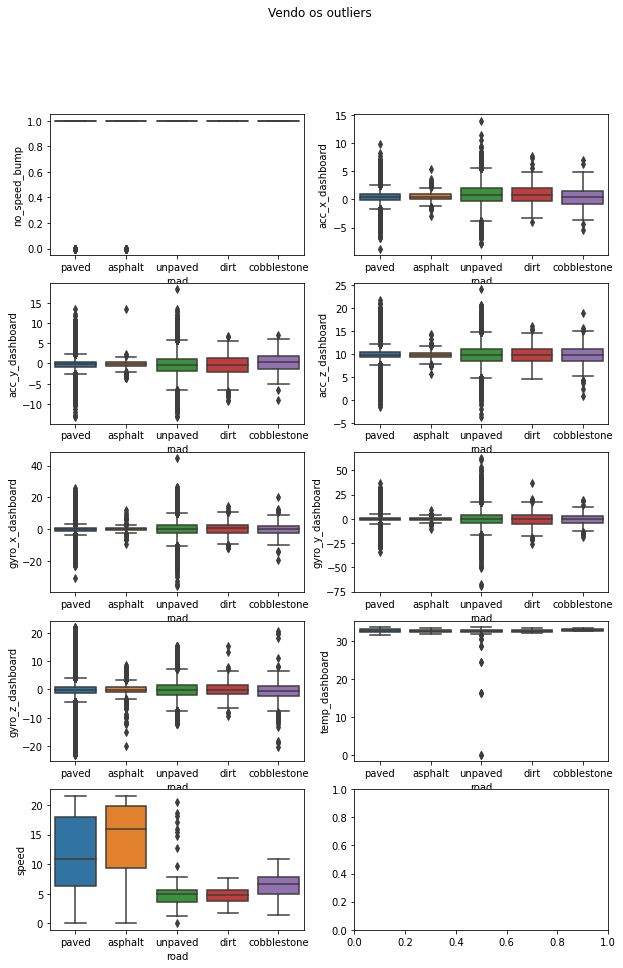

In [20]:
colunas = []
for coluna in dados2:
    colunas.append(coluna)

ind_col = 0
ind_linha = 0
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
fig.suptitle("Vendo os outliers")

for i in range (len(colunas) - 1):
    sns.boxplot(data=dados2, x=colunas[-1], y=colunas[i], ax=axes[ind_linha, ind_col])
    
    if ind_col == 1:
        ind_col = 0
        ind_linha += 1
    else:
        ind_col += 1 

In [21]:
dados_remove = dados2.loc[(dados2['speed'] > 8) & (dados2['road'] == 'unpaved')]

In [22]:
ultimo_df = dados2.drop(dados_remove.index)

In [23]:
dados2 = ultimo_df

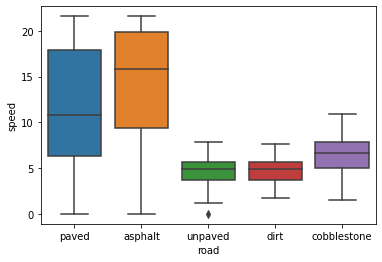

In [24]:
sns.boxplot(data=dados2, x=dados2['road'], y=dados2['speed'])

## Seleção e pre-processamento de colunas (padronização/normalização, label encoding, one hot encoder, etc – aplicar o que for necessário!)

In [25]:
colunasCategorias = ['road']
dados2 = pd.get_dummies(data=dados2, columns=colunasCategorias)
display(dados2)

,no_speed_bump,acc_x_dashboard,acc_y_dashboard,acc_z_dashboard,gyro_x_dashboard,gyro_y_dashboard,gyro_z_dashboard,temp_dashboard,speed,road_asphalt,road_cobblestone,road_dirt,road_paved,road_unpaved
1,1.0,-0.039008,0.009110,9.819322,-0.030518,0.115743,-0.051173,32.453560,0.010822,0,0,0,1,0
2,1.0,0.010073,0.005518,9.777423,-0.122070,0.100485,-0.020655,32.405637,0.010822,0,0,0,1,0
3,1.0,0.020847,0.028263,9.785803,0.061035,0.207296,-0.112208,32.453560,0.010822,0,0,0,1,0
4,1.0,-0.003095,-0.017227,9.800168,-0.091553,0.146261,-0.112208,32.309791,0.010822,0,0,0,1,0
5,1.0,0.006482,0.011504,9.850446,0.000000,-0.342020,-0.081690,32.357714,0.010822,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124679,1.0,0.427861,-0.261435,9.958185,0.030518,-0.006327,0.070898,32.070177,0.023570,0,0,0,1,0
124680,1.0,0.466169,-0.316502,9.867206,-0.122070,-0.082621,-0.020655,32.094138,0.023570,0,0,0,1,0
124681,1.0,0.332093,-0.555922,9.646939,-0.183105,-0.067362,0.101415,32.261868,0.023570,0,0,0,1,0
124682,1.0,0.339276,-0.570287,9.824110,-0.122070,-0.006327,-0.173243,32.070177,0.023570,0,0,0,1,0


## Separação correta das variáveis entre features (entrada) x label (saída)

In [26]:
dados2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113898 entries, 1 to 124683
Data columns (total 14 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   no_speed_bump     113898 non-null  float64
 1   acc_x_dashboard   113898 non-null  float64
 2   acc_y_dashboard   113898 non-null  float64
 3   acc_z_dashboard   113898 non-null  float64
 4   gyro_x_dashboard  113898 non-null  float64
 5   gyro_y_dashboard  113898 non-null  float64
 6   gyro_z_dashboard  113898 non-null  float64
 7   temp_dashboard    113898 non-null  float64
 8   speed             113898 non-null  float64
 9   road_asphalt      113898 non-null  uint8  
 10  road_cobblestone  113898 non-null  uint8  
 11  road_dirt         113898 non-null  uint8  
 12  road_paved        113898 non-null  uint8  
 13  road_unpaved      113898 non-null  uint8  
dtypes: float64(9), uint8(5)
memory usage: 13.3 MB


In [70]:
x = dados2.drop(columns=['no_speed_bump', 'temp_dashboard', 'speed'])
y = dados2['speed']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [28]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113898 entries, 1 to 124683
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   acc_x_dashboard   113898 non-null  float64
 1   acc_y_dashboard   113898 non-null  float64
 2   acc_z_dashboard   113898 non-null  float64
 3   gyro_x_dashboard  113898 non-null  float64
 4   gyro_y_dashboard  113898 non-null  float64
 5   gyro_z_dashboard  113898 non-null  float64
 6   road_asphalt      113898 non-null  uint8  
 7   road_cobblestone  113898 non-null  uint8  
 8   road_dirt         113898 non-null  uint8  
 9   road_paved        113898 non-null  uint8  
 10  road_unpaved      113898 non-null  uint8  
dtypes: float64(6), uint8(5)
memory usage: 10.7 MB


In [29]:
print(len(x_train))
print(len(y_train))
print(len(x_test))
print(len(y_test))

91118
91118
22780
22780


## Seleção e treinamento de modelos pertinentes ao problema elencado

In [30]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from scipy.stats import pearsonr

In [31]:
from sklearn.neural_network import MLPRegressor # Importando a Rede Neural MLP para Regressão

In [32]:
ml_perceptron = MLPRegressor(solver='lbfgs', # otimizador por métodos quasi-Newton
                             tol=1e-5, # Limiar para a otimização (treinamento)
                             max_iter=1500, # Limite de iterações durante a otimização (treinamento)
                             random_state=42, # (seed) pesos da rede são inicializados aleatoriamente
                             hidden_layer_sizes=(10,4), # Quantidade de neuronios por camada oculta #(12,7,3)
                             activation='relu') # Função de ativação dos neuronios

ml_perceptron.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


MLPRegressor(hidden_layer_sizes=(10, 4), max_iter=1500, random_state=42,
             solver='lbfgs', tol=1e-05)

Feedback: Redes Neurais teve uma melhor performance do que o LinearRegression

## Levantar as métricas de desempenho adequadas a técnica escolhida e ao problema modelado

Redes Neurais

In [33]:
y_predicoes = ml_perceptron.predict(x_test)

In [34]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  2.9016758846582107


In [35]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  16.046248196976006
raiz MSE:  4.005776853118007


In [36]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.594715220841754


In [37]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apenas neste caso de utilização)

ρ: 0.7711848135455954


LinearRegression

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lr = LinearRegression()

lr.fit(x_train,y_train)

LinearRegression()

In [40]:
y_predicoes = lr.predict(x_test)

In [41]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  4.115541585416945


In [42]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  27.96603085284626
raiz MSE:  5.288291865323458


In [43]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.29365378753991367


In [44]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apenas neste caso de utilização)

ρ: 0.5419335179139528


Random Forest Regressor

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [63]:
RFR = RandomForestRegressor()
RFR.fit(x_train, y_train)
y_predicoes = RFR.predict(x_test)

In [64]:
y_predicoes = RFR.predict(x_test)

In [65]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  2.2591123092430263


In [66]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  10.797745950326831
raiz MSE:  3.2859923843987877


In [67]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.7272781756105602


In [68]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apenas neste caso de utilização)

ρ: 0.8528185845730966


DecisionTreeRegressor

In [69]:
from sklearn.tree import DecisionTreeRegressor

In [71]:
DTR = DecisionTreeRegressor()
DTR.fit(x_train, y_train)
y_predicoes = DTR.predict(x_test)

In [72]:
y_predicoes = DTR.predict(x_test)

In [73]:
MAE = mean_absolute_error(y_true = y_test,      # Gabarito
                          y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MAE: ', MAE)

MAE:  2.912465302564098


In [74]:
MSE = mean_squared_error(y_true = y_test,      # Gabarito
                         y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('MSE: ', MSE)
print('raiz MSE: ', MSE**0.5)

MSE:  21.262550614167907
raiz MSE:  4.611133332941903


In [75]:
R2 = r2_score(y_true = y_test,      # Gabarito
              y_pred = y_predicoes) # Respostas do algoritmo ao teste realizado
print('R2: ', R2)  # Quanto mais próximos de 1 melhor

R2:  0.4629655465738055


In [76]:
rho = pearsonr(y_test, y_predicoes)
print('\u03C1:', rho[0]) # Quanto mais próximo de 1, melhor (OBS: apenas neste caso de utilização)

ρ: 0.7314400628562806


## Capacidade de inferir conclusões a partir de uma análise exploratória e analisar o desempenho de modelos de aprendizado de máquina

- As explicações devem ser pertinentes e consistentes com as análises feitas. Será avaliada a argumentação baseada em dados.
    - uma interpretação qualitativa da análise exploratória;
    - discussão dos outliers observados
    - justificativa da escolha da abordagem (por que optaram por 
regressão/classificação/clusterização?);
    - discussão da métrica de erro (a métrica tem um bom valor? Por 
quê?)

## Conclusão 2

### Análise exploratória
  Analisando os gráficos de boxplot percebemos uma quantidade muito grande de outliers na "road unpaved", quando analisamos em conjunto com o "speed" e isso pode ser um problema, pois não queremos uma velocidade muito alta nas ruas não pavimentadas, porque isso pode causar danos aos carros.

### Discussão dos outliers
  Como visto anteriormente existem outliers em "road unpaved" que podem nos atrapalhar na hora de colher os dados que queremos com o nosso machine learning e para evitar isso, decidimos por realizar a remoção deles.
### Justificativa da escolha
  Optamos por um algoritmo de regressão, pois queriamos um retorno de intervalos numéricos e esses intervalos seriam a velocidade do carro nas estradas.
### Métrica de erro
  Optamos por utilizar 4 algoritmos: LinearRegression, MLPRegressor, RandomForestRegressor e DecisionTreeRegression. Observamos as métricas do primeiro e reparamos que ele não possue métricas muito boas, as velocidades preditas podem ter uma margem de erro de 4 m/s, enquanto que nos outros algoritmos esse valor cai para em média 2 m/s. Isso pode parecer pouco, mas vale ressaltar que 1 m/s = 3,6 km/h. Também vimos que o terceiro algoritmo (RandomForestRegressor) obteve o maior R², e se tivessemos que optar por um algoritmo seria esse.